### Importing and normalizing the dataset

In [20]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing the dataset to have values in range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshaping from (N, 28, 28) to (N, 784) as 
# to get vector representations
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


### Building the network

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras import regularizers

In [43]:
encoding_dim = 32 # We are mapping images from 784 -> 32
img_dim = 784

input_img = Input(shape=(784,))

encoder_layer = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoder_layer = Dense(img_dim, activation='sigmoid')(encoder_layer)

autoencoder = Model(input_img, decoder_layer)

encoder = Model(input_img, encoder_layer) # Model mapping 784 -> 32
encoded_input = Input(shape=(encoding_dim,))

decoder_layer_ = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer_(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [44]:
class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=False):
        super(Callback, self).__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            self.model.stop_training = True

In [49]:
callbacks = [
    EarlyStoppingByLossVal(verbose=True)
]

autoencoder.fit(x_train, 
                x_train, 
                epochs=100, 
                batch_size=256, 
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=callbacks)

Epoch 1/100
235/235 [==============================] - 3s 14ms/step - loss: 0.0989 - val_loss: 0.0977
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.0989 - val_loss: 0.0976
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.0988 - val_loss: 0.0975
Epoch 4/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0988 - val_loss: 0.0975
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0987 - val_loss: 0.0974
Epoch 6/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0986 - val_loss: 0.0973
Epoch 7/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0986 - val_loss: 0.0973
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0985 - val_loss: 0.0972
Epoch 9/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0985 - val_loss: 0.0972
Epoch 10/100
235/235 [==============================] - 2s 11ms/step - loss: 0.0984 -

Epoch 81/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0964 - val_loss: 0.0951
Epoch 82/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0964 - val_loss: 0.0952
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 84/100
235/235 [==============================] - 2s 9ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 85/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 86/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 87/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 88/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 89/100
235/235 [==============================] - 2s 10ms/step - loss: 0.0963 - val_loss: 0.0951
Epoch 90/100
235/235 [==============================] - 2s 10ms/step - loss

In [50]:
encoded_images = encoder.predict(x_test[:10])
decoded_images = decoder.predict(encoded_images)

In [51]:
import matplotlib.pyplot as plt

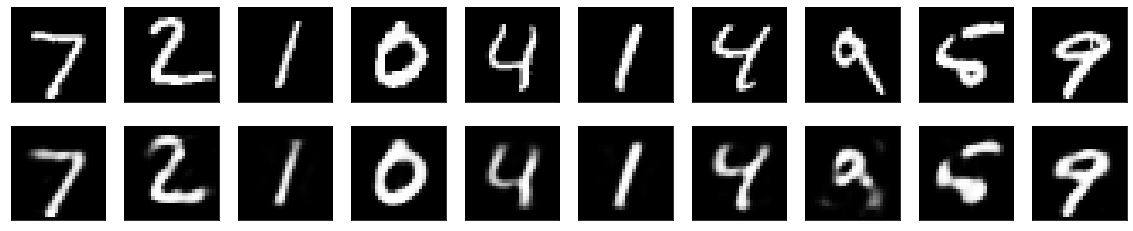

In [52]:
plt.figure(figsize=(20,4))

for i in range(10):
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, 10, i + 1 + 10)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()